In [45]:
from pylab import *
import netCDF4
import numpy as np
import sys
from matplotlib import colors, ticker
from matplotlib.colors import LogNorm
from matplotlib import pyplot as plt
from scipy import stats
from scipy import signal

In [2]:
data = netCDF4.Dataset( 'data/cm1out.nc', 'r', format='NETCDF4')

In [3]:
# Import variables of interest
X = array(data.variables['ni'])           # radial grid values
Z = array(data.variables['nk'])           # vertical grid values
rain_fall = array(data.variables['rain']) # suface accumulated rainfall
prs = array(data.variables['prs'])        # pressure (all vertical levels)
surf_prs = array(data.variables['sps'])   # surface pressure
DH = array(data.variables['th9'])         # radial grid values
U = array(data.variables['uinterp'])      # radial velocity
V = array(data.variables['vinterp'])      # tangential velocity
W = array(data.variables['winterp'])      # vertical velocity
time = array(data.variables['time'])      # time

In [4]:
# reshape 4-dim variable to 3-dim (t,z,x)
U_T = U.reshape(U.shape[0],U.shape[1],U.shape[3])
V_T = V.reshape(V.shape[0],V.shape[1],V.shape[3])
W_T = W.reshape(W.shape[0],W.shape[1],W.shape[3])
DH_T = DH.reshape(DH.shape[0],DH.shape[1],DH.shape[3])
prs_T = prs.reshape(prs.shape[0],prs.shape[1],prs.shape[3])
# reshape 3-dim to 2-dim
s_prs_T = surf_prs.reshape(surf_prs.shape[0],surf_prs.shape[2])
s_rain = rain_fall.reshape(rain_fall.shape[0],rain_fall.shape[2])

# change pressure to mb (millibars)
prs_mb = prs_T/100
s_prs_mb = s_prs_T/100

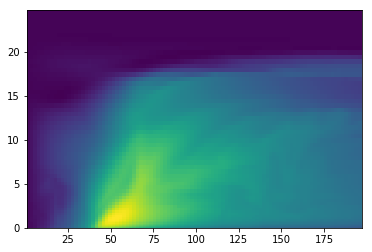

In [5]:
plt.pcolormesh(X[0:99],Z,V_T[100,:,0:99])

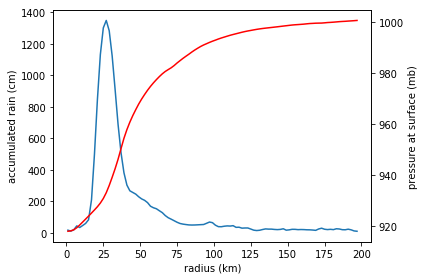

In [6]:
fig, ax1 = plt.subplots()

ax1.set_xlabel('radius (km)')
ax1.set_ylabel('accumulated rain (cm)')
ax1.plot(X[0:99],s_rain[40,0:99])

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

ax2.set_ylabel('pressure at surface (mb)')  # we already handled the x-label with ax1
ax2.plot(X[0:99],prs_mb[40,0,0:99],'r')

fig.tight_layout()  # otherwise the right y-label is slightly clipped

In [28]:
# looking at correlation of variables with tangential wind and pressure
# Day 10-45
# Variables of interest are tangential velocity (V_T), vertical velocity (W_T), diabatic
#     heating (DH_T), pressure (prs_mb), and radial velocity (U_T)

t_len = 480
t_win = 440

time_test = time[40:t_len]/1440

prs_test = prs_mb[40:t_len,0,0:99]
V_test = V_T[40:t_len,:,0:99]
DH_test = DH_T[40:t_len,:,0:99]
W_test = W_T[40:t_len,:,0:99]
U_test = U_T[40:t_len,:,0:99]

prs_min = np.empty(t_win)
V_max = np.empty(t_win)
DH_max = np.empty(t_win)
W_max = np.empty(t_win)
U_min = np.empty(t_win)

for t in range(t_win):
    prs_min[t] = np.amin(prs_test[t,:])
    V_max[t] = np.amax(V_test[t,:,:])
    DH_max[t] = np.amax(DH_test[t,:,:])
    W_max[t] = np.amax(W_test[t,:,:])
    U_min[t] = np.amin(U_test[t,:,:])

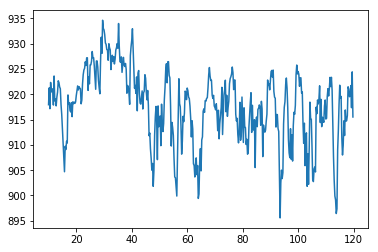

In [29]:
plt.plot(time_test,prs_min)

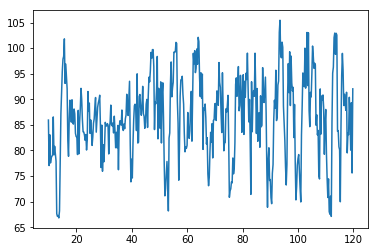

In [30]:
plt.plot(time_test,V_max)

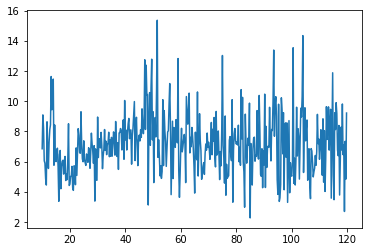

In [31]:
plt.plot(time_test,W_max)

In [112]:
time[180]/1440

45.0

In [32]:
# Correlations
# Pearson correlations

VP_cor = stats.pearsonr(V_max,prs_min)
VU_cor = stats.pearsonr(V_max,U_min)
VW_cor = stats.pearsonr(V_max,W_max)
VDH_cor = stats.pearsonr(V_max,DH_max)
PU_cor = stats.pearsonr(prs_min,U_min)
PW_cor = stats.pearsonr(prs_min,W_max)
PDH_cor = stats.pearsonr(prs_min,DH_max)

print('V-Prs correlation = ', VP_cor)
print('V-U correlation = ', VU_cor)
print('V-W correlation = ', VW_cor)
print('V-DH correlation = ', VDH_cor)
print('Prs-U correlation = ', PU_cor)
print('Prs-W correlation = ', PW_cor)
print('Prs-DH correlation = ', PDH_cor)

V-Prs correlation =  (-0.7573749262490744, 4.237764419841814e-83)
V-U correlation =  (-0.9451681566459925, 5.434227007863881e-215)
V-W correlation =  (0.33916895989993984, 2.630285040954164e-13)
V-DH correlation =  (0.2995891437300438, 1.4149642109053766e-10)
Prs-U correlation =  (0.6284198361721139, 9.989555208182039e-50)
Prs-W correlation =  (-0.29050335788750886, 5.273037365182877e-10)
Prs-DH correlation =  (-0.2073463828682022, 1.1614382485337452e-05)


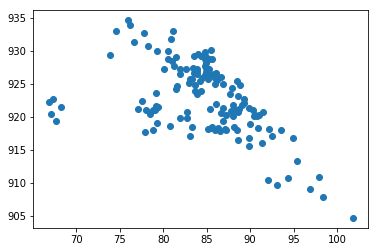

In [27]:
plt.scatter(V_max,prs_min)

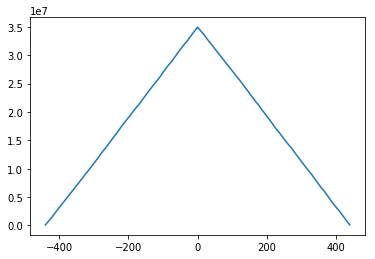

In [49]:
plt.plot(linspace(-440,440,879),signal.correlate(V_max,prs_min))


In [50]:
argmax(signal.correlate(V_max,prs_min))

439